<a href="https://colab.research.google.com/github/sourabhgupta385/coursera-intro-to-tenserflow/blob/master/Handwriting_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/10
60000/60000 [==============================] - 9s 151us/sample - loss: 0.2222 - acc: 0.9359
Epoch 2/10
60000/60000 [==============================] - 9s 148us/sample - loss: 0.0915 - acc: 0.9722
Epoch 3/10
60000/60000 [==============================] - 9s 148us/sample - loss: 0.0609 - acc: 0.9813
Epoch 4/10
60000/60000 [==============================] - 9s 145us/sample - loss: 0.0444 - acc: 0.9865
Epoch 5/10
59840/60000 [============================>.] - ETA: 0s - loss: 0.0328 - acc: 0.9900
Reached 99% accuracy so cancelling training!
10000/10000 [==============================] - 1s 61us/sample - loss: 0.0744 - acc: 0.9773
7
[1.5616788e-09 1.4313697e-09 2.8901741e-06 3.0644954e-04 6.0277965e-13
 8.5171594e-09 2.2093755e-13 9.9969053e-01 4.8469857e-08 1.3143595e-07]
[1.5621622e-09 1.4318128e-09 2.8910688e-06 3.0654442e-04 6.0296624e-13
 8.5197964e-09 2.2100595e-13 1.0000000e+00 4.8484861e-08 1.3147664e-07]


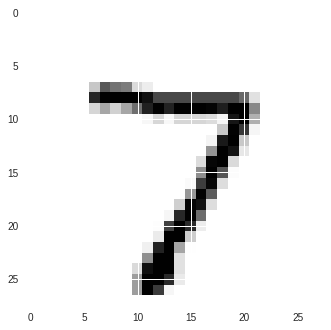

In [9]:
# YOUR CODE SHOULD START HERE
import matplotlib.pyplot as plt
# YOUR CODE SHOULD END HERE
import tensorflow as tf
mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
# YOUR CODE SHOULD START HERE
x_train, x_test = x_train/255.0, x_test/255.0

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('acc') > 0.99):
      print("\nReached 99% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()    
    
#plt.imshow(x_train[0])
# YOUR CODE SHOULD END HERE
model = tf.keras.models.Sequential([
# YOUR CODE SHOULD START HERE
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation=tf.nn.relu),
    tf.keras.layers.Dense(10,activation=tf.nn.softmax),
# YOUR CODE SHOULD END HERE
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# YOUR CODE SHOULD START HERE
model.fit(x_train, y_train, epochs=10, callbacks=[callbacks])
model.evaluate(x_test, y_test)
classifications = model.predict(x_test)
plt.imshow(x_test[0])
print(y_test[0])
print(classifications[0] / max(classifications[0]))
# YOUR CODE SHOULD END HERE